<a href="https://colab.research.google.com/github/Tahascommit/Health_Insurance_Cross_Sell_Prediction/blob/main/ML_Summative_Classification_Health_Insurance_Cross_Sell_Prediction_Taha_Saifee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Classification - Health Insurance Cross Sell Prediction



# **Problem Statement**


The goal of this project is to assist our client, an Insurance company, in strategically expanding its offerings by introducing Vehicle Insurance to its current base of Health Insurance customers. The key challenge is to accurately identify customers who are likely to show interest in this new Vehicle Insurance product. To tackle this, we aim to develop a predictive analytics model that utilizes customer data to forecast their propensity to purchase Vehicle Insurance.

This model will analyze various customer attributes, including demographic details (such as age, gender, and region), vehicle-related information (such as vehicle age and damage history), and aspects of their existing health insurance policies (like premium amounts and sourcing channels). The intent is to uncover patterns and relationships within this data that correlate with a customer's likelihood to buy Vehicle Insurance.

The successful deployment of this model is expected to significantly enhance the client's marketing efficiency by enabling targeted communication strategies. This focused approach is anticipated to not only streamline the company's outreach efforts but also potentially boost its revenue through higher conversion rates.

The project involves conducting a thorough Exploratory Data Analysis to gain insights into the customer base, performing feature engineering to refine the data for predictive modeling, and building and validating a machine learning model. The ultimate aim is to provide the insurance company with a data-driven tool for identifying prospective Vehicle Insurance customers among their existing policyholders, thereby aiding in informed decision-making for their Vehicle Insurance marketing campaigns.








# Overview of dataset features:

**id:** Identifier for each customer.

**Gender:** Gender of the policyholder.

**Age:** Age of the policyholder.

**Driving_License:** Indicates whether the policyholder has a driving license (1 for yes, 0 for no).

**Region_Code:** Coded representation of the region of the policyholder.

**Previously_Insured:** Indicates whether the policyholder already has vehicle insurance (1 for yes, 0 for no).

**Vehicle_Age:** Age of the vehicle.

**Vehicle_Damage:** Indicates whether the vehicle was previously damaged (Yes or No).

**Annual_Premium:** The amount of premium paid annually by the policyholder.

**Policy_Sales_Channel:** Code for the channel of outreach to the policyholder.

**Vintage:** Number of days the policyholder has been associated with the company.

**Response:** Target variable indicating whether the policyholder is interested in vehicle insurance (1 for interested, 0 for not interested).

## Importing Data

In [1]:
import pandas as pd


In [2]:
# Read the csv file to dataframe using pandas

data = pd.read_csv('https://raw.githubusercontent.com/Tahascommit/Health_Insurance_Cross_Sell_Prediction/main/TRAIN-HEALTH%20INSURANCE%20CROSS%20SELL%20PREDICTION.csv')

In [3]:
# Display the first few rows of the dataset for an initial overview
data.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Checking number of records we have in dataset
data.shape

(381109, 12)

In [5]:
# Number of rows in dataset

print('Number of rows in dataset is',data.shape[0])

Number of rows in dataset is 381109


In [6]:
# Number of columns (features) in dataset

print('Number of columns(features) in dataset is',data.shape[1])

Number of columns(features) in dataset is 12


## Evaluating Data

In [7]:
# Checking for missing values
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values in the dataset across all columns.

In [8]:
# Checking for duplicate rows
data.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [9]:
# Checking data types
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

The datatype is consistent for the type of data in each column

With the data quality check complete and no immediate issues identified, we can proceed to the statistical summary of the dataset.

# Statistical Summary:

In [10]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Numerical Features:**

**Age:** Ranges from 20 to 85 years with a mean of approximately 38.82 years.

**Driving_License:** Nearly all customers (99.79%) have a driving license.

**Region_Code:** The region codes vary from 0 to 52.
Previously_Insured: About 45.82% of customers were previously insured.

**Annual_Premium:** The premium amounts vary significantly, with a mean of 30,564 and a wide range (2,630 to 540,165).
Policy_Sales_Channel: Sales channels are numerically encoded, ranging from 1 to 163.

**Vintage:** The number of days customers have been associated with the company ranges from 10 to 299 days.

**Response (Target Variable):**

**Response:** Indicates whether the customer is interested in vehicle insurance, with about 12.26% showing interest (1).

# EDA:

1. **Distribution Analysis:**



*   Analyzing the distribution of individual features, particularly focusing on the target variable **Response**.
*   Examining the distributions of key numerical variables like **Age**, **Annual_Premium**, and **Vintage**.



1. **Distribution Analysis:**



*   Analyzing the distribution of individual features, particularly focusing on the target variable **Response**.
*   Examining the distributions of key numerical variables like **Age**, **Annual_Premium**, and **Vintage**.



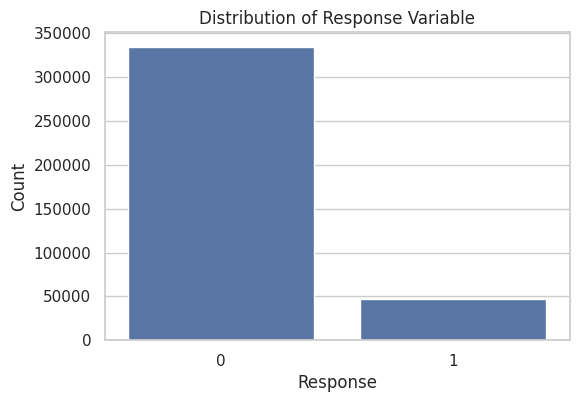

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the grid for the plots
sns.set(style="whitegrid")

# Distribution of the target variable - Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=data, order=data['Response'].value_counts().index)
plt.title('Distribution of Response Variable')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


**Distribution of Response Variable:**

Shows the count of customers interested (1) and not interested (0) in vehicle insurance. It's evident that a smaller proportion of customers are interested in vehicle insurance.

Also we can see that the dataset is imbalanced. We will deal with it in later stage

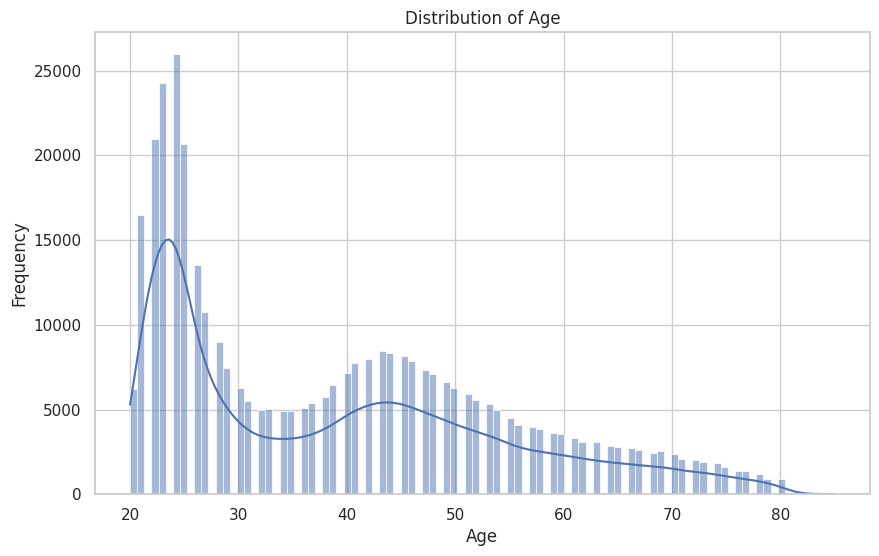

In [12]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Distribution of Age:**

The age distribution shows a wide range, with a higher concentration of younger customers.

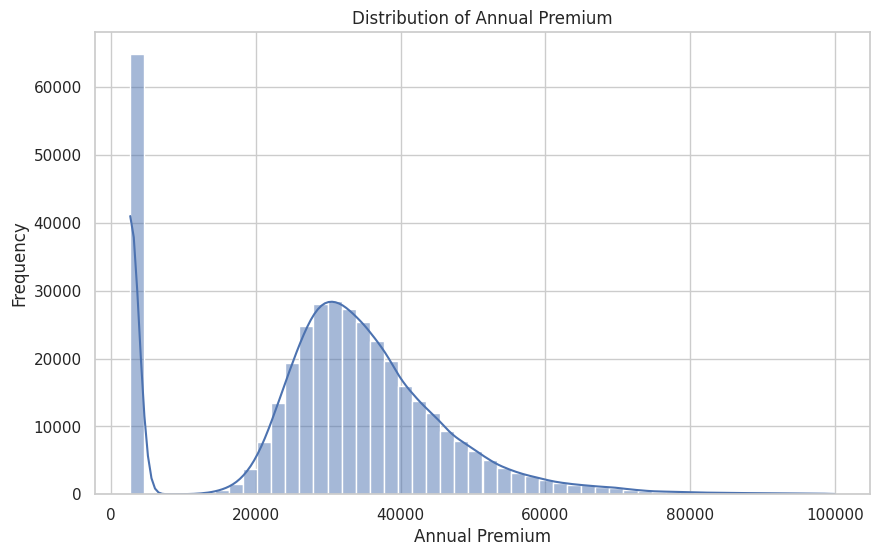

In [13]:
# Distribution of Annual Premium
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Annual_Premium'] < 100000]['Annual_Premium'], bins=50, kde=True) # Limiting to 100000 for better visualization
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

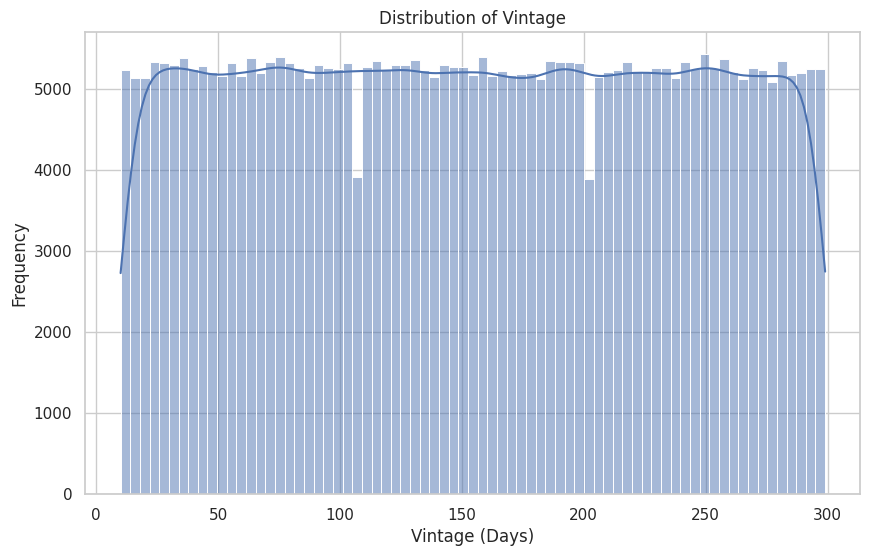

In [14]:
# Distribution of Vintage
plt.figure(figsize=(10, 6))
sns.histplot(data['Vintage'], kde=True)
plt.title('Distribution of Vintage')
plt.xlabel('Vintage (Days)')
plt.ylabel('Frequency')
plt.show()

2. **Bivariate Analysis:**


Bivariate analysis involves examining the relationship between two variables. For our purposes, we'll focus on how the independent variables relate to the target variable Response. This will help us understand which factors may influence a customer's decision to be interested in vehicle insurance.

Let's start by examining the following relationships:

**Age and Response:** To see if there's a particular age group that shows more interest in vehicle insurance.

**Gender and Response:** To determine if one gender is more inclined towards vehicle insurance than the other.

**Annual Premium and Response:** To investigate if the amount of the annual premium is associated with interest in vehicle insurance.

**Driving License and Response:** To check if having a driving license affects the interest in vehicle insurance.

**Previously Insured and Response:** To explore if customers who already have some insurance are more or less likely to be interested in vehicle insurance.

**Vehicle Age and Response:** To observe if the age of the vehicle has any impact on the interest in insurance.

**Vehicle Damage and Response:** To assess if past vehicle damage is a factor in considering vehicle insurance.

For categorical variables like **Gender**, P**reviously Insured**, **Vehicle Age**, and **Vehicle Damage**, we will use count plots. For continuous variables like **Age** and **Annual Premium**, we will use box plots or violin plots.



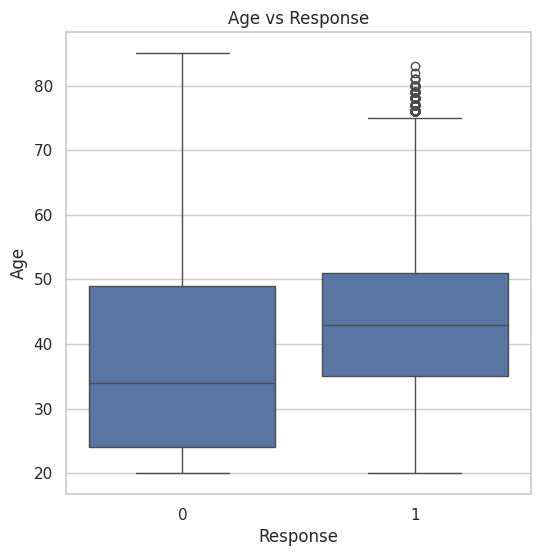

In [15]:
# Bivariate Analysis: Age and Response
plt.figure(figsize=(6, 6))
sns.boxplot(x='Response', y='Age', data=data)
plt.title('Age vs Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

**Age vs Response:**

The boxplot suggests that customers who are interested in vehicle insurance tend to be older than those who are not interested.

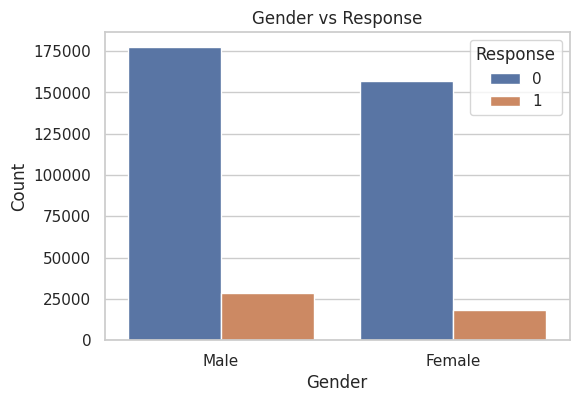

In [16]:
# Bivariate Analysis: Gender and Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Response', data=data)
plt.title('Gender vs Response')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Gender vs Response:**

The countplot shows the distribution of interest in vehicle insurance across different genders.

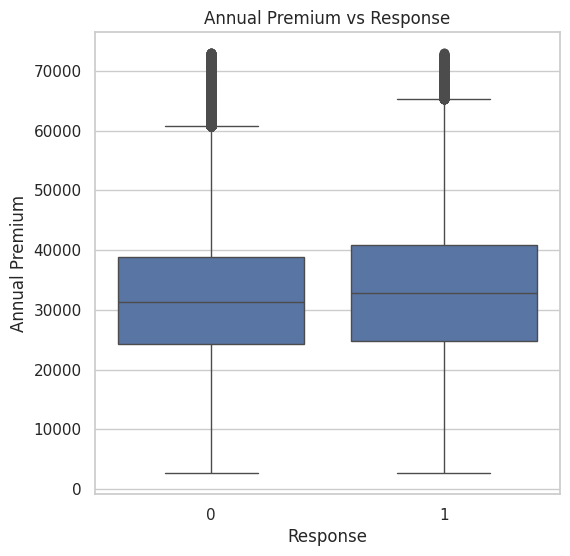

In [17]:
# Bivariate Analysis: Annual Premium and Response
# Considering a subset of data for annual premium to avoid extreme values for better visualization
plt.figure(figsize=(6, 6))
sns.boxplot(x='Response', y='Annual_Premium', data=data[data['Annual_Premium'] < data['Annual_Premium'].quantile(0.99)])
plt.title('Annual Premium vs Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.show()

**Annual Premium vs Response:**

The boxplot for Annual Premium indicates that the median annual premium is slightly higher for customers interested in vehicle insurance, but there's a lot of overlap between the two groups.

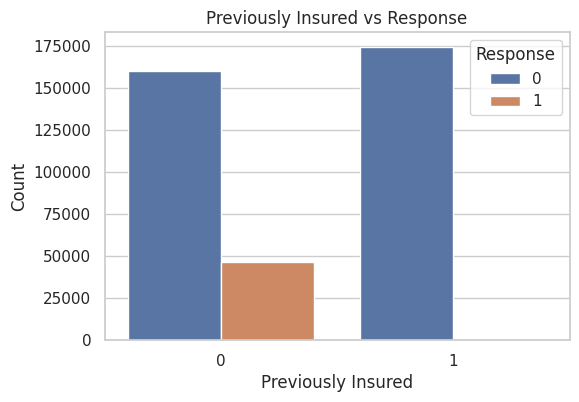

In [18]:
# Bivariate Analysis: Previously Insured and Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', hue='Response', data=data)
plt.title('Previously Insured vs Response')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.show()

**Previously Insured vs Response:**

It appears that customers who are not previously insured are more likely to be interested in vehicle insurance.

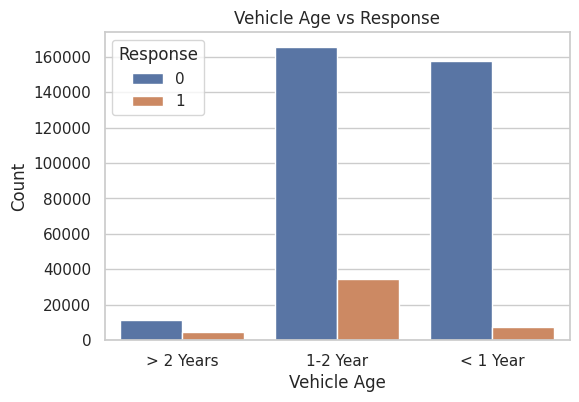

In [19]:
# Bivariate Analysis: Vehicle Age and Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Age', hue='Response', data=data)
plt.title('Vehicle Age vs Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

**Vehicle Age vs Response:**

There seems to be a noticeable difference in interest based on the age of the vehicle.

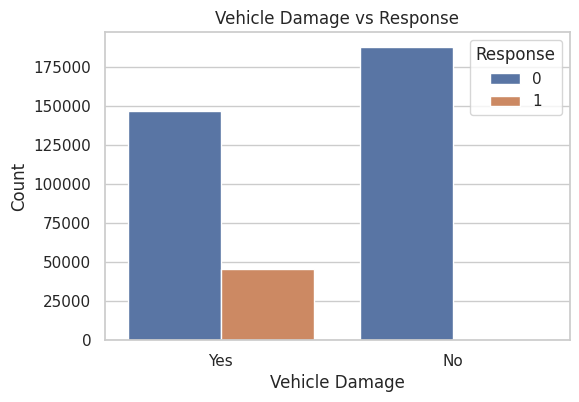

In [20]:
# Bivariate Analysis: Vehicle Damage and Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Damage', hue='Response', data=data)
plt.title('Vehicle Damage vs Response')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

**Vehicle Damage vs Response:**

Customers with previous vehicle damage show more interest in vehicle insurance compared to those without.

# 3. **Correlation Analysis:**


Assessing the correlations between numerical features.
This can help in understanding interdependencies and potential multicollinearity issues.

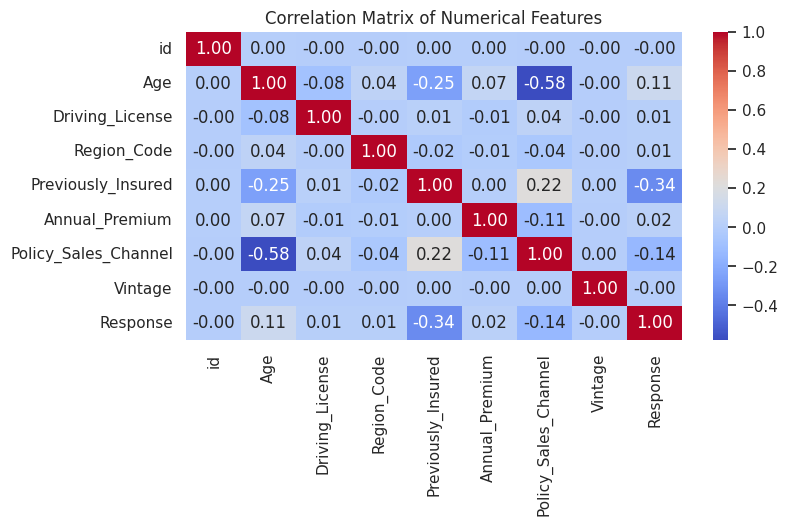

In [21]:
# Correlation Analysis
# Calculating the correlation matrix for numerical features
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


As observed, there are no columns that are co-related (we won't plot any scatterplot) because there are no column that is in red shade or near-red shade. There will be no issue of multicolinearity in further analysis

# 4. **Advanced Categorical Analysis:**


We'll conduct a deeper examination of categorical variables:

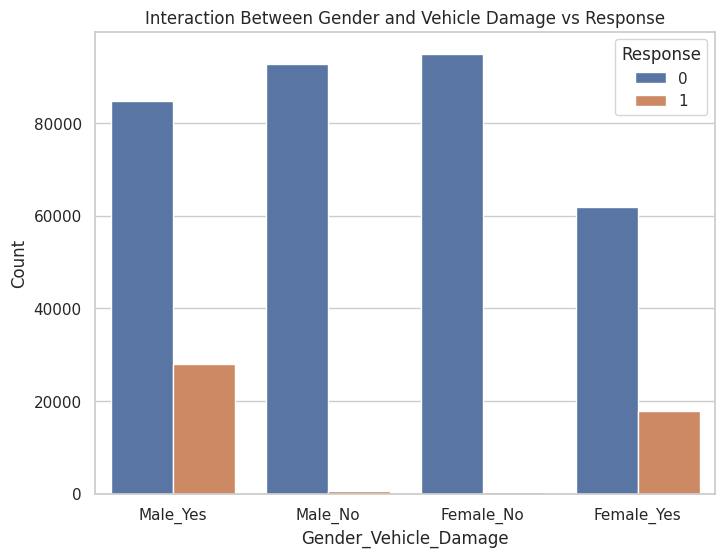

In [22]:
# Feature Interaction Analysis: Gender and Vehicle Damage

# Creating a new feature that combines Gender and Vehicle_Damage for visualization
data['Gender_Vehicle_Damage'] = data['Gender'].astype(str) + '_' + data['Vehicle_Damage'].astype(str)

# Plotting the interaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Vehicle_Damage', hue='Response', data=data)
plt.title('Interaction Between Gender and Vehicle Damage vs Response')
plt.xlabel('Gender_Vehicle_Damage')
plt.ylabel('Count')
plt.show()

The countplot illustrates the interaction between **Gender** and **Vehicle_Damage** in relation to the **Response**. In this visualization:

Each bar represents a unique combination of **Gender** and **Vehicle_Damage**.
The color differentiation within each bar shows the count of responses (**interested** vs. **not interested**) for each combination.

**Observations:**


**Gender and Vehicle Damage Impact:** The plot provides insights into how the combination of gender and vehicle damage history might influence a customer's interest in vehicle insurance.

**Trends and Patterns:** It seems that certain combinations have a higher likelihood of showing interest in vehicle insurance. For example, one of the combinations shows a noticeably higher interest level than others.

**Gender Differences:** The plot might also hint at potential differences in how gender impacts the interest in vehicle insurance, especially when combined with the vehicle's damage history.

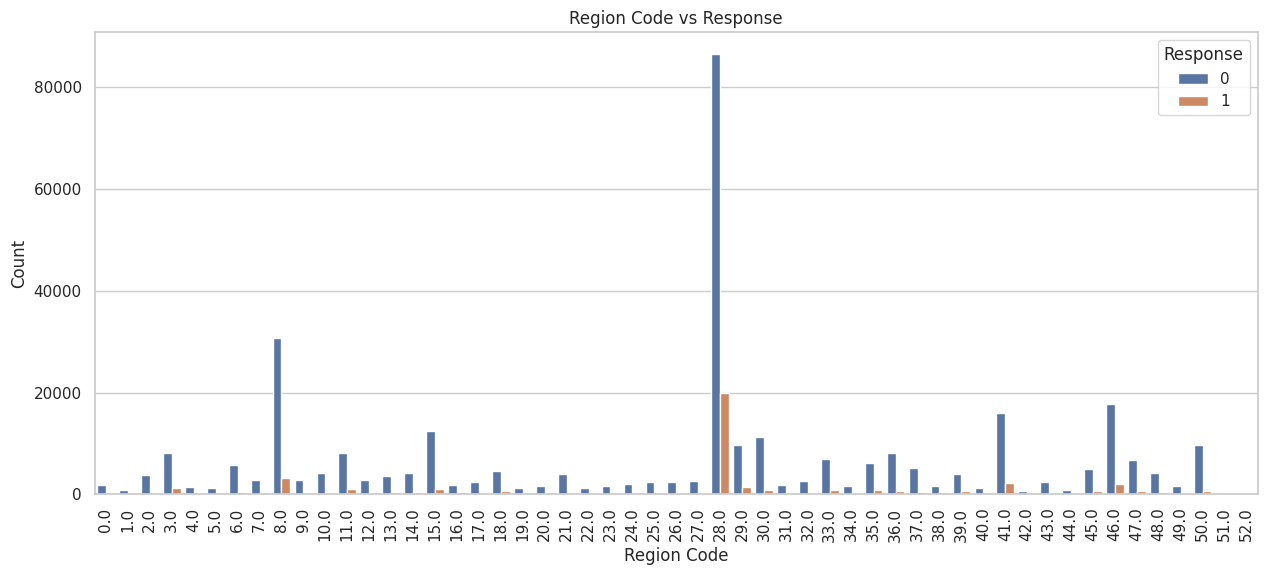

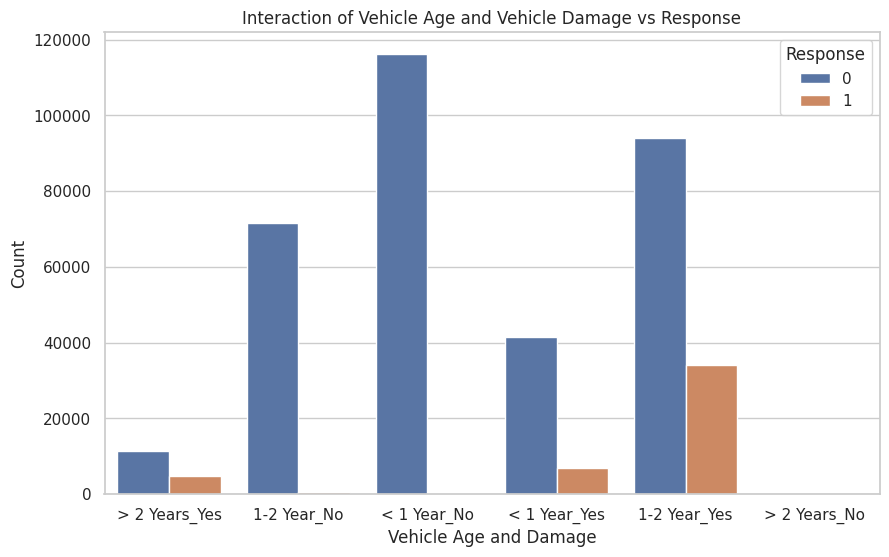

In [23]:
# Advanced Categorical Analysis: Region_Code and Response

# Plotting the relationship between Region_Code and Response
plt.figure(figsize=(15, 6))
sns.countplot(x='Region_Code', hue='Response', data=data)
plt.title('Region Code vs Response')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Advanced Categorical Analysis: Vehicle Age, Vehicle Damage, and Response

# Creating a combined feature for Vehicle Age and Vehicle Damage
data['Vehicle_Age_Damage'] = data['Vehicle_Age'].astype(str) + '_' + data['Vehicle_Damage'].astype(str)

# Plotting the interaction
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Age_Damage', hue='Response', data=data)
plt.title('Interaction of Vehicle Age and Vehicle Damage vs Response')
plt.xlabel('Vehicle Age and Damage')
plt.ylabel('Count')
plt.show()


**The visualizations provide insights into the relationships between the categorical variables and the target variable Response.**

**Region Code vs Response:**

The countplot shows how interest in vehicle insurance varies across different region codes. Some regions have higher counts of interested customers, suggesting regional differences in insurance interest.

**Interaction of Vehicle Age and Vehicle Damage vs Response:**

This countplot combines Vehicle_Age and Vehicle_Damage into a single feature to explore their combined impact on insurance interest.

The plot indicates that certain combinations (like older vehicles with damage history) have a higher proportion of customers interested in vehicle insurance.

**Key Takeaways:**

These analyses help identify which features and their interactions have a more significant impact on the target variable.

Such insights can be vital for tailoring marketing strategies and for feature engineering in predictive modeling.

# Data Preparation

In [24]:
# Peeking over the dataframe
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Vehicle_Damage,Vehicle_Age_Damage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Male_Yes,> 2 Years_Yes
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Male_No,1-2 Year_No
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Male_Yes,> 2 Years_Yes
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Male_No,< 1 Year_No
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Female_No,< 1 Year_No


In [25]:
# For simplicity, we'll use all available features except the id and the combined features we created earlier

model_features = data.drop(columns=['Gender_Vehicle_Damage', 'Vehicle_Age_Damage'])

In [26]:
# Let's look at the new dataset

model_features.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variables

# Encoding 'Gender', 'Vehicle_Age', 'Vehicle_Damage' using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in categorical_columns:
    model_features[col] = label_encoder.fit_transform(model_features[col])


In [28]:
# Let's look at the dataset after encoding

model_features.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### Outlier cleaning

In [29]:
# Logically seeing, the columns that could have potential outliers are 'Age', 'Annual_Premium' and 'Vintage'

# Let's analyze them one by one

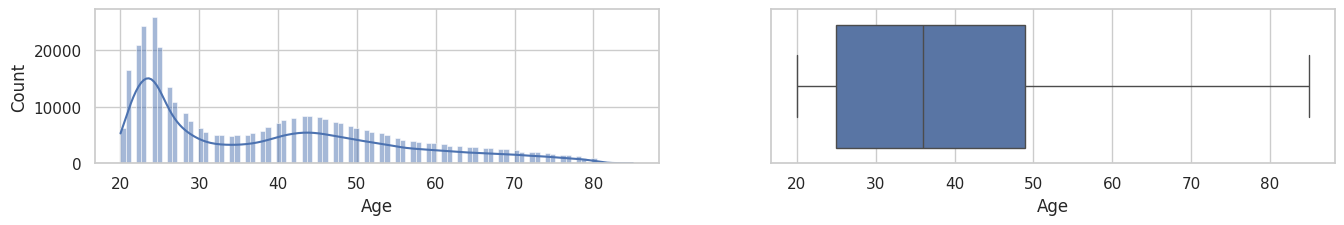

In [30]:
# Checking for presence of outliers in 'Age' column

plt.figure(figsize=(16, 2))

# First subplot: Histogram (Distribution) of 'Age'
plt.subplot(1, 2, 1)
sns.histplot(model_features['Age'], kde=True)  # Use sns.histplot for a histogram


#Checking the outliers first with box-plot also.

# Second subplot: Boxplot of 'Age'
plt.subplot(1, 2, 2)
sns.boxplot(x=model_features['Age'])

plt.show()

There is no presense of outliers in 'Age' column as indicated by the box-plot

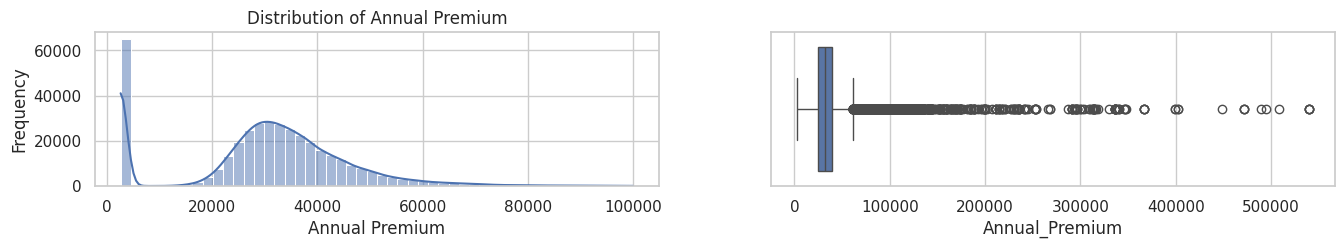

In [31]:
# Checking for presence of outliers in 'Annual_Premium' column

plt.figure(figsize=(16, 2))

# First subplot: Histogram (Distribution) of 'Annual_Premium'
plt.subplot(1, 2, 1)
sns.histplot(model_features[model_features['Annual_Premium'] < 100000]['Annual_Premium'], bins=50, kde=True) # Limiting to 100000 for better visualization
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')

#Checking the outliers first with box-plot also.

# Second subplot: Boxplot of 'Annual_Premium'
plt.subplot(1, 2, 2)
sns.boxplot(x=model_features['Annual_Premium'])

plt.show()

As observed from the box-plot of 'Annual_Premium' column there is heavy presense of outliers and also the distribution of of 'Annual_Premium' column is right skewed so we will use IQR method for this type of data

In [32]:
# Using IQR to clean the outliers from Carat column

Q1 = model_features['Annual_Premium'].quantile(0.25)
Q2 = model_features['Annual_Premium'].quantile(0.50)
Q3 = model_features['Annual_Premium'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

# Calculate the total number of rows in the dataset
total_rows = model_features.shape[0]

# Calculate the total number of outliers
count_of_outliers = len(model_features[(model_features['Annual_Premium'] < lower_bound) | (model_features['Annual_Premium'] > upper_bound)])

# Calculate the percentage of rows that will be removed if outliers are deleted
percentage_lost = (count_of_outliers / total_rows) * 100

print('Percentage of rows that will be removed if outliers are deleted: {:.2f}%'.format(percentage_lost))

Percentage of rows that will be removed if outliers are deleted: 2.71%


As this is very small ratio of outliers as comapred to the whole dataset, we will proceed deleting the rows with outliers in 'Annual_Premium' column

In [33]:
# Trimming outliers in Annual_Premium column

model_features = model_features[(model_features['Annual_Premium'] >= lower_bound) & (model_features['Annual_Premium'] <= upper_bound)]

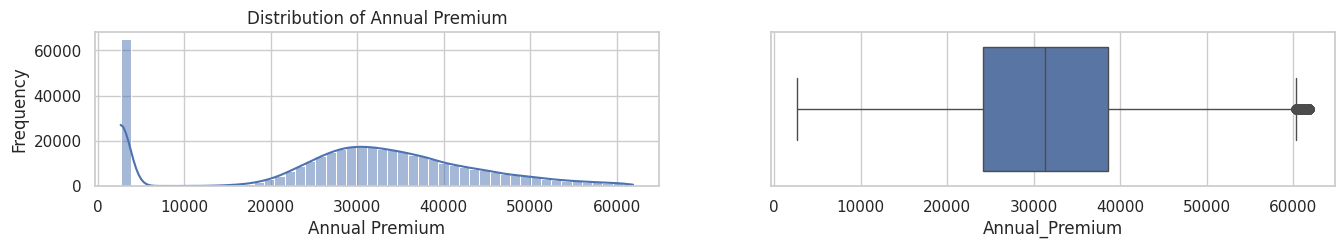

In [34]:
# Checking if the outliers are successfully removed 'Annual_Premium' column

plt.figure(figsize=(16, 2))

# First subplot: Histogram (Distribution) of 'Annual_Premium'
plt.subplot(1, 2, 1)
sns.histplot(model_features[model_features['Annual_Premium'] < 100000]['Annual_Premium'], bins=50, kde=True) # Limiting to 100000 for better visualization
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')

# Second subplot: Boxplot of 'Annual_Premium'
plt.subplot(1, 2, 2)
sns.boxplot(x=model_features['Annual_Premium'])

plt.show()

In [35]:
# As observed there still exist a minor amount of outliers.

# Lets further clean them by percentile method of outlier removal

In [36]:
# Lets remove 1 percentile values only from both sides
lower_percentile = 1
upper_percentile = 99

# Calculate the percentile values
lower_bound = model_features['Annual_Premium'].quantile(lower_percentile / 100)
upper_bound = model_features['Annual_Premium'].quantile(upper_percentile / 100)

# Filter the data to keep only values within the percentile range
model_features = model_features[(model_features['Annual_Premium'] >= lower_bound) & (model_features['Annual_Premium'] <= upper_bound)]



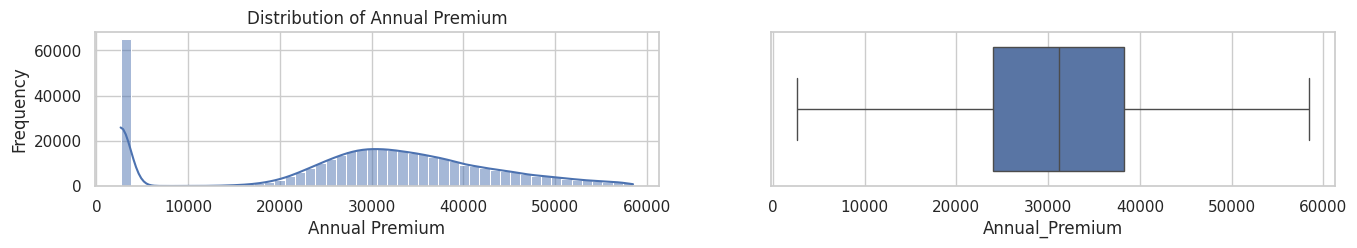

In [37]:
# Checking if the outliers are successfully removed 'Annual_Premium' column

plt.figure(figsize=(16, 2))

# First subplot: Histogram (Distribution) of 'Annual_Premium'
plt.subplot(1, 2, 1)
sns.histplot(model_features[model_features['Annual_Premium'] < 100000]['Annual_Premium'], bins=50, kde=True) # Limiting to 100000 for better visualization
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')

# Second subplot: Boxplot of 'Annual_Premium'
plt.subplot(1, 2, 2)
sns.boxplot(x=model_features['Annual_Premium'])

plt.show()

We have sucessfully cleaned the outliers from 'Annual_Premium' column

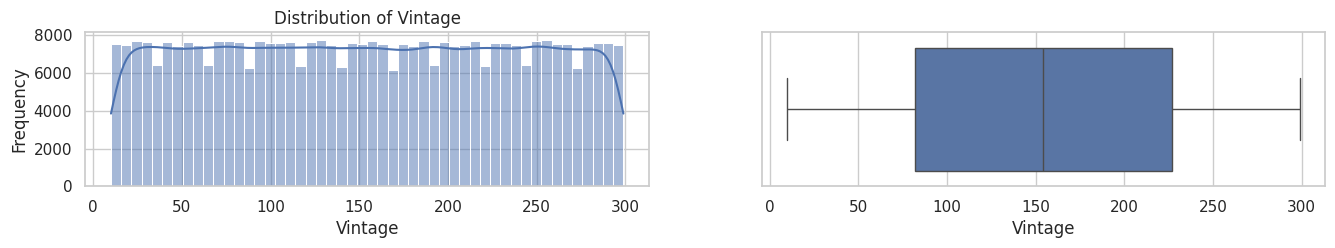

In [38]:
# Checking for presence of outliers in 'Vintage' column

plt.figure(figsize=(16, 2))

# First subplot: Histogram (Distribution) of 'Vintage'
plt.subplot(1, 2, 1)
sns.histplot(model_features[model_features['Vintage'] < 100000]['Vintage'], bins=50, kde=True) # Limiting to 100000 for better visualization
plt.title('Distribution of Vintage')
plt.xlabel('Vintage')
plt.ylabel('Frequency')

#Checking the outliers first with box-plot also.

# Second subplot: Boxplot of 'Vintage'
plt.subplot(1, 2, 2)
sns.boxplot(x=model_features['Vintage'])

plt.show()

There is no presense of outliers in 'Vintage' column as indicated by the box-plot

We have now successfully cleaned the outliers

### Standardizing,splitting and handling imbalance

In [39]:
# Making X and Y set and dropping 'id' column that is not of use in model training
X = model_features.drop(['Response', 'id'], axis=1)
y = model_features['Response']

In [40]:
# Split X and y into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.preprocessing import StandardScaler

# Define the continuous columns
continuous_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

# Apply the same scaler to transform the test set
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [42]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
77597,0,0.092055,1,1.091030,1,0,0,0.350369,0.207464,-1.354726
223503,0,0.481708,1,0.116220,1,0,0,1.035782,-1.608929,-1.235167
197019,0,-1.141847,1,-1.233516,1,1,0,-1.818309,0.726434,-1.641669
36,1,2.105263,1,-1.383487,1,0,0,0.825061,-1.738672,1.179929
286705,0,0.286882,1,0.116220,0,0,1,0.457146,-1.608929,-0.266737


As known from the previous EDA analysis our dataset was imbalanced as the target outputs were in varying proportion compared to each other.


After splitting the training and testing set, we will now see that how much imbalance is in our training set of 'y'

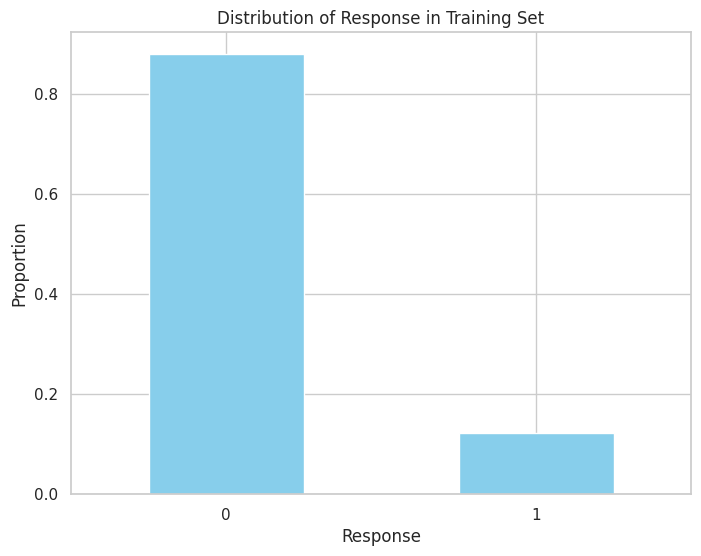

In [43]:
# Check the balance of the target variable 'Response' in the training set
response_counts = y_train.value_counts(normalize=True)

# Create a bar plot
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Response in Training Set')
plt.xlabel('Response')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

It is clearly evident that our training data is also imbalanced.


We will further use SMOTE technique to balance the dataset.

In [44]:
# Using SMOTE to balance the training dataset

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

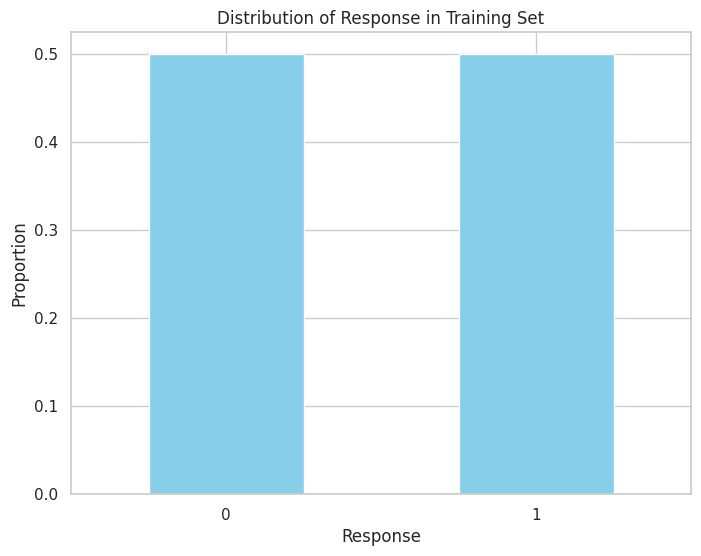

In [45]:
# Check the balance of the target variable after SMOTE
response_counts_smote = y_train_smote.value_counts(normalize=True)

# Create a bar plot
plt.figure(figsize=(8, 6))
response_counts_smote.plot(kind='bar', color='skyblue')
plt.title('Distribution of Response in Training Set')
plt.xlabel('Response')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

As seen, we have successfully handled the imbalance of output target variable in both training sets and now our dataset is fully ready for ML model training.

# Machine Learning Model Building

We have a binary classification problem in hand.

For binary classification, common algorithms include

**Logistic Regression**

**Decision Trees**

**Random Forest**

**Gradient Boosting Machines.**

We will use these algorithms because they are well-understood, widely used, and provide a good baseline for binary classification tasks.

Let's start by training a Logistic Regression model, which is a good baseline for binary classification problems due to its simplicity and efficiency. We will then proceed with more complex models.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the Logistic Regression model to the training data
logreg.fit(X_train_smote, y_train_smote)

# Perform cross-validation on the balanced training data
logreg_cv_scores = cross_val_score(logreg, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Calculate the mean AUC score from cross-validation
logreg_cv_auc = logreg_cv_scores.mean()
print('Logistic Regression mean AUC score:', logreg_cv_auc)

Logistic Regression mean AUC score: 0.821676601561629


The Logistic Regression model has been trained using cross-validation on the balanced training data, and the mean AUC score is approximately 0.822 (On Training Data). This score is a measure of the model's ability to distinguish between the two classes.

In [47]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
nb_classifier = GaussianNB()

# Fit the Gaussian Naive Bayes model to the training data
nb_classifier.fit(X_train_smote, y_train_smote)

# Perform cross-validation on the balanced training data
nb_cv_scores = cross_val_score(nb_classifier, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Calculate the mean AUC score from cross-validation
nb_cv_auc = nb_cv_scores.mean()
print('Gaussian Naive Bayes mean AUC score:', nb_cv_auc)


Gaussian Naive Bayes mean AUC score: 0.8281761237671699


The Naive Bayes model has been trained using cross-validation on the balanced training data, and the mean AUC score is approximately 0.828 (On Training Data). This score is a measure of the model's ability to distinguish between the two classes.

Next, we will train a Decision Tree model, which can capture non-linear patterns in the data. We will evaluate its performance using the same cross-validation approach.

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree Classifier to the training data
decision_tree.fit(X_train_smote, y_train_smote)

# Perform cross-validation on the balanced training data
decision_tree_cv_scores = cross_val_score(decision_tree, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Calculate the mean AUC score from cross-validation
decision_tree_cv_auc = decision_tree_cv_scores.mean()
print('Decision Tree mean AUC score:', decision_tree_cv_auc)

Decision Tree mean AUC score: 0.8892745222472943


The Decision Tree model has a mean AUC score of approximately 0.889 (On Training Data), indicating a better performance than the Logistic Regression and Naive Bayes model in distinguishing between the two classes.

We will continue with training a Random Forest model, which is an ensemble of decision trees and often provides better generalization performance.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier to the training data
random_forest.fit(X_train_smote, y_train_smote)

# Perform cross-validation on the balanced training data
random_forest_cv_scores = cross_val_score(random_forest, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Calculate the mean AUC score from cross-validation
random_forest_cv_auc = random_forest_cv_scores.mean()
print('Random Forest mean AUC score:', random_forest_cv_auc)

Random Forest mean AUC score: 0.982370163129237


The Random Forest model shows a mean AUC score of approximately 0.982, which is a significant improvement over all three, the Logistic Regression, Decision Tree and Naive Bayes models

Now, we will train a Gradient Boosting Machine (GBM) model, which builds an ensemble of trees in a sequential manner, where each tree tries to correct the errors of the previous one. This often leads to better performance on complex datasets.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Fit the Gradient Boosting Classifier to the training data
gradient_boosting.fit(X_train_smote, y_train_smote)

# Perform cross-validation on the balanced training data
gradient_boosting_cv_scores = cross_val_score(gradient_boosting, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Calculate the mean AUC score from cross-validation
gradient_boosting_cv_auc = gradient_boosting_cv_scores.mean()
print('Gradient Boosting mean AUC score:', gradient_boosting_cv_auc)

Gradient Boosting mean AUC score: 0.916984532495283


The Gradient Boosting Classifier has been evaluated, and the mean AUC score is approximately 0.917. This is a strong performance, though not as high as the Random Forest model.

Given the results, the Random Forest model has the highest mean AUC score (0.982) from cross-validation, suggesting it may be the best ((On Training Data).) model among those we've tested.

Let's now train hyperparameter for Random Forest to see if we can get more AUC score

In [51]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the Grid Search model
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='roc_auc',
#                            verbose=1,
#                            n_jobs=-1)

# # Fit the Grid Search to the data
# grid_search.fit(X_train_smote, y_train_smote)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print('Best hyperparameters:', best_params)

# # Get the best score
# best_score = grid_search.best_score_
# print('Best AUC score from Grid Search:', best_score)

Can't run GridSearchCV here on google colab because it will take forever to execute on google colab's low-power CPU. And also as researched, RandomForest cannot use GPU provided by google as it is from scikit learn.


Still we are getting AUC score of approximately 0.982 with RandomForest without hyperparameter tuning.

This high could be cause of overfitting on training data. We will verify this in later stage when we plot ROC-AUC on testing data. It may happen that this model won't perfrom good on testing data.

Let's now use XGboost for further analysis

In [52]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV




# Define the XGBoost classifier with GPU support
xgb_clf = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.7, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train_smote, y_train_smote.values.ravel())

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("---------------")
print("---------------")
print(f"Best parameters found: {best_params}")
print(f"Best ROC-AUC score from GridSearchCV is {best_score}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:32:57] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:32:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


---------------
---------------
Best parameters found: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.7}
Best ROC-AUC score from GridSearchCV is 0.968272410603055


As XGboost is not from scikit learn, we did hyperparameter tuning using GPU of google colab and got the best parameter.

Let's now use the best parameter and fit XGboost model on training data.

In [53]:
import xgboost as xgb
import warnings
from sklearn.metrics import roc_auc_score

# Ignore specific warnings (in this case, FutureWarnings)
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the XGBoost classifier with the best parameters
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=500,
    subsample=1.0,
    tree_method='hist',  # Update tree_method to 'hist'
    device='cuda',  # Add device parameter with 'cuda'
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the classifier to the training data
xgb_clf.fit(X_train_smote, y_train_smote.values.ravel())

# Predict the probabilities for the test data
xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, xgb_probs)

print('\nROC AUC score:', roc_auc)



ROC AUC score: 0.8460027568872712


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:33:12] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


As we trained XGBoost on best hyperparameters and got ROC-AUC score. We will now compare all the model's score and then procees selecting the best model depending on business goals descriptively

In [54]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score

# Predict probabilities for the test set
logreg_probs = logreg.predict_proba(X_test)[:, 1]
naive_bayes_probs = nb_classifier.predict_proba(X_test)[:, 1]
decision_tree_probs = decision_tree.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest.predict_proba(X_test)[:, 1]
gradient_boosting_probs = gradient_boosting.predict_proba(X_test)[:, 1]
xg_boosting_probs = xgb_probs

Above, we have calculated probability giving the test set for prediction to each trained model

In [55]:
# Calculate ROC curve and AUC for each model
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = auc(logreg_fpr, logreg_tpr)

naive_bayes_fpr, naive_bayes_tpr, _ = roc_curve(y_test, naive_bayes_probs)
naive_bayes_auc = auc(naive_bayes_fpr, naive_bayes_tpr)

decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

gradient_boosting_fpr, gradient_boosting_tpr, _ = roc_curve(y_test, gradient_boosting_probs)
gradient_boosting_auc = auc(gradient_boosting_fpr, gradient_boosting_tpr)

xg_boosting_fpr, xg_boosting_tpr, _ = roc_curve(y_test, xg_boosting_probs)
xg_boosting_auc = auc(xg_boosting_fpr, xg_boosting_tpr)




Above, we have first we have calculated False-Positive-Rate(fpr) and True-Positive-rate for each model giving the y values of test set and predicted probabilities and then we got auc for each model

In [56]:
# Calculate precision, recall, and F1-score for each model
logreg_precision = precision_score(y_test, logreg.predict(X_test))
logreg_recall = recall_score(y_test, logreg.predict(X_test))
logreg_f1 = f1_score(y_test, logreg.predict(X_test))


naive_bayes_precision = precision_score(y_test, nb_classifier.predict(X_test))
naive_bayes_recall = recall_score(y_test, nb_classifier.predict(X_test))
naive_bayes_f1 = f1_score(y_test, nb_classifier.predict(X_test))

decision_tree_precision = precision_score(y_test, decision_tree.predict(X_test))
decision_tree_recall = recall_score(y_test, decision_tree.predict(X_test))
decision_tree_f1 = f1_score(y_test, decision_tree.predict(X_test))

random_forest_precision = precision_score(y_test, random_forest.predict(X_test))
random_forest_recall = recall_score(y_test, random_forest.predict(X_test))
random_forest_f1 = f1_score(y_test, random_forest.predict(X_test))

gradient_boosting_precision = precision_score(y_test, gradient_boosting.predict(X_test))
gradient_boosting_recall = recall_score(y_test, gradient_boosting.predict(X_test))
gradient_boosting_f1 = f1_score(y_test, gradient_boosting.predict(X_test))

xg_boosting_precision = precision_score(y_test, xgb_clf.predict(X_test))
xg_boosting_recall = recall_score(y_test, xgb_clf.predict(X_test))
xg_boosting_f1 = f1_score(y_test, xgb_clf.predict(X_test))

Above, we calculated Precision, Recall and F1 score for each model

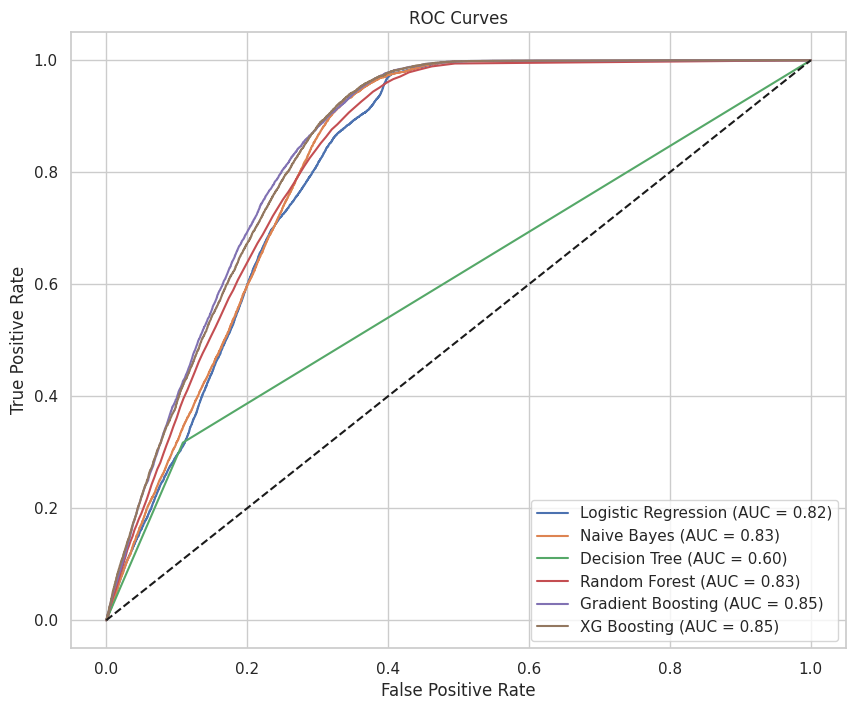

In [57]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(naive_bayes_fpr, naive_bayes_tpr, label='Naive Bayes (AUC = %0.2f)' % naive_bayes_auc)
plt.plot(decision_tree_fpr, decision_tree_tpr, label='Decision Tree (AUC = %0.2f)' % decision_tree_auc)
plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest (AUC = %0.2f)' % random_forest_auc)
plt.plot(gradient_boosting_fpr, gradient_boosting_tpr, label='Gradient Boosting (AUC = %0.2f)' % gradient_boosting_auc)
plt.plot(xg_boosting_fpr, xg_boosting_tpr, label='XG Boosting (AUC = %0.2f)' % xg_boosting_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

As seen in the above plot, Gradient Boosting and XG Boosting is giving highest AUC value. Which model to select depends on various other factors that we will analyze in next section

In [58]:
# Print precision, recall, and F1-score for each model with 3 decimal places
print('Logistic Regression Precision: {:.3f}'.format(logreg_precision))
print('Logistic Regression Recall: {:.3f}'.format(logreg_recall))
print('Logistic Regression F1 Score: {:.3f}'.format(logreg_f1))
print("-------------------------------------------------")
print('Naive Bayes Precision: {:.3f}'.format(naive_bayes_precision))
print('Naive Bayes Recall: {:.3f}'.format(naive_bayes_recall))
print('Naive Bayes F1 Score: {:.3f}'.format(naive_bayes_f1))
print("-------------------------------------------------")
print('Decision Tree Precision: {:.3f}'.format(decision_tree_precision))
print('Decision Tree Recall: {:.3f}'.format(decision_tree_recall))
print('Decision Tree F1 Score: {:.3f}'.format(decision_tree_f1))
print("-------------------------------------------------")
print('Random Forest Precision: {:.3f}'.format(random_forest_precision))
print('Random Forest Recall: {:.3f}'.format(random_forest_recall))
print('Random Forest F1 Score: {:.3f}'.format(random_forest_f1))
print("-------------------------------------------------")
print('Gradient Boosting Precision: {:.3f}'.format(gradient_boosting_precision))
print('Gradient Boosting Recall: {:.3f}'.format(gradient_boosting_recall))
print('Gradient Boosting F1 Score: {:.3f}'.format(gradient_boosting_f1))
print("-------------------------------------------------")
print('XGBoost Precision: {:.3f}'.format(xg_boosting_precision))
print('XGBoost Recall: {:.3f}'.format(xg_boosting_recall))
print('XGBoost F1 Score: {:.3f}'.format(xg_boosting_f1))


Logistic Regression Precision: 0.250
Logistic Regression Recall: 0.975
Logistic Regression F1 Score: 0.397
-------------------------------------------------
Naive Bayes Precision: 0.250
Naive Bayes Recall: 0.975
Naive Bayes F1 Score: 0.397
-------------------------------------------------
Decision Tree Precision: 0.287
Decision Tree Recall: 0.317
Decision Tree F1 Score: 0.301
-------------------------------------------------
Random Forest Precision: 0.334
Random Forest Recall: 0.329
Random Forest F1 Score: 0.331
-------------------------------------------------
Gradient Boosting Precision: 0.290
Gradient Boosting Recall: 0.874
Gradient Boosting F1 Score: 0.435
-------------------------------------------------
XGBoost Precision: 0.310
XGBoost Recall: 0.724
XGBoost F1 Score: 0.434


# Selecting Best Model Depending On Business Goal

In the context of the Problem Statement we will provide the below statements on model selection depending on business goal

**High Recall Objective:** If the primary goal is to identify as many interested customers as possible, even at the risk of including some who are not interested (to ensure no potential lead is missed), then a model with high recall is crucial. In this case:

*   **Logistic Regression and Naive Bayes** stand out with a **recall of 0.975**. They will flag almost all customers who are interested in vehicle insurance, but also include a significant number of customers who are not, leading to a higher number of false positives.


**High Precision Objective:** If the goal is to maximize the efficiency of marketing efforts by targeting only those most likely to be interested (thereby conserving resources and avoiding unnecessary outreach), then a model with high precision is desired. For this purpose:

*   **Random Forest** is the best among the models you've tested, with a **precision of 0.334**. It will produce fewer false positives, meaning that a higher proportion of the customers it identifies will actually be interested in vehicle insurance.


**Balance Between Precision and Recall:** If the aim is to strike a balance between identifying interested customers and minimizing the number of false leads (to avoid overburdening the marketing team with follow-ups on unlikely prospects), then the F1 score, which is the harmonic mean of precision and recall, becomes an important metric. In this scenario:

*   **Gradient Boosting** is the most suitable model with the highest **F1 score of 0.435**, indicating it has the best balance between precision and recall among the models you've evaluated.


**Overall Model Performance:** Considering the AUC, which provides an aggregate measure of performance across all possible classification thresholds, the models that stand out are:

*   **Gradient Boosting and XG Boosting**, both with an **AUC of 0.85**, indicating strong overall performance in distinguishing between customers who are interested and those who are not.

.


In summary, the choice of the model should align with the specific objectives of the marketing strategy for cross-selling vehicle insurance:



*   For maximizing the identification of potential leads, **Logistic Regression or Naive Bayes** would be appropriate.



*   For ensuring marketing efficiency with a focus on likely interested customers, **Random Forest** would be the choice.

*   For a balanced approach, **Gradient Boosting** offers the best trade-off.

*   For overall model performance based on AUC, **Gradient Boosting and XG Boosting** are the top contenders.



Each model has its strengths, and the final selection should consider the specific costs associated with false positives and false negatives, as well as the operational constraints of the marketing campaign.







# Future Work

We will consider that the XGBoost satisfies the business requirement as stated above and is the best model

Now we will use pickle save the model for deployment. And we will load the model again and check the loaded model prediction

In [65]:
import pickle
from sklearn.metrics import roc_auc_score

# Threshold for converting probabilities to binary format
threshold = 0.5

# Save the XGBoost classifier as a pickle file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)

# Load the XGBoost classifier using pickle
with open('xgb_model.pkl', 'rb') as file:
    loaded_xgb_model = pickle.load(file)

# Select the first observation from the test set
first_observation = X_test.iloc[0:1]

# Make predictions with the original model for the first observation
original_xgb_prob = xgb_clf.predict_proba(first_observation)[0, 1]
original_xgb_pred = 1 if original_xgb_prob >= threshold else 0

# Make predictions with the loaded model for the first observation
loaded_xgb_prob = loaded_xgb_model.predict_proba(first_observation)[0, 1]
loaded_xgb_pred = 1 if loaded_xgb_prob >= threshold else 0

# Calculate the ROC AUC score for the entire test set (optional)
roc_auc_original = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
roc_auc_loaded = roc_auc_score(y_test, loaded_xgb_model.predict_proba(X_test)[:, 1])

# Compare the predictions for the first observation
print(f"Prediction for the first observation:")
print(f"Original Model - Probability: {original_xgb_prob}, Binary Prediction: {original_xgb_pred}")
print(f"Loaded Model - Probability: {loaded_xgb_prob}, Binary Prediction: {loaded_xgb_pred}")

# Print the ROC AUC scores
print('\nROC AUC score (Original Model):', roc_auc_original)
print('ROC AUC score (Loaded Model):', roc_auc_loaded)


Prediction for the first observation:
Original Model - Probability: 0.7777021527290344, Binary Prediction: 1
Loaded Model - Probability: 0.7777021527290344, Binary Prediction: 1

ROC AUC score (Original Model): 0.8460027568872712
ROC AUC score (Loaded Model): 0.8460027568872712


As observed, our pkl file model and our original model has same prediction.

Now our model is ready for deployment